# Logistic Regression 
- Coded By : <span style="color: red;">Eng.Ahmed Almohamdy</span>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
pd.set_option("display.max_columns" , None)

In [23]:
data = pd.read_csv('Churn_Modelling.csv')

In [24]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
data.shape

(10000, 14)

In [26]:
data.drop(columns=['RowNumber' , 'Surname']  , inplace= True)

In [27]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
from sklearn.model_selection import train_test_split
train_data , validation_data = train_test_split(data , test_size= .2 , random_state=2022) 

In [29]:
num_cols = list(set(train_data.describe().columns) - set(['CustomerId']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['CustomerId']))

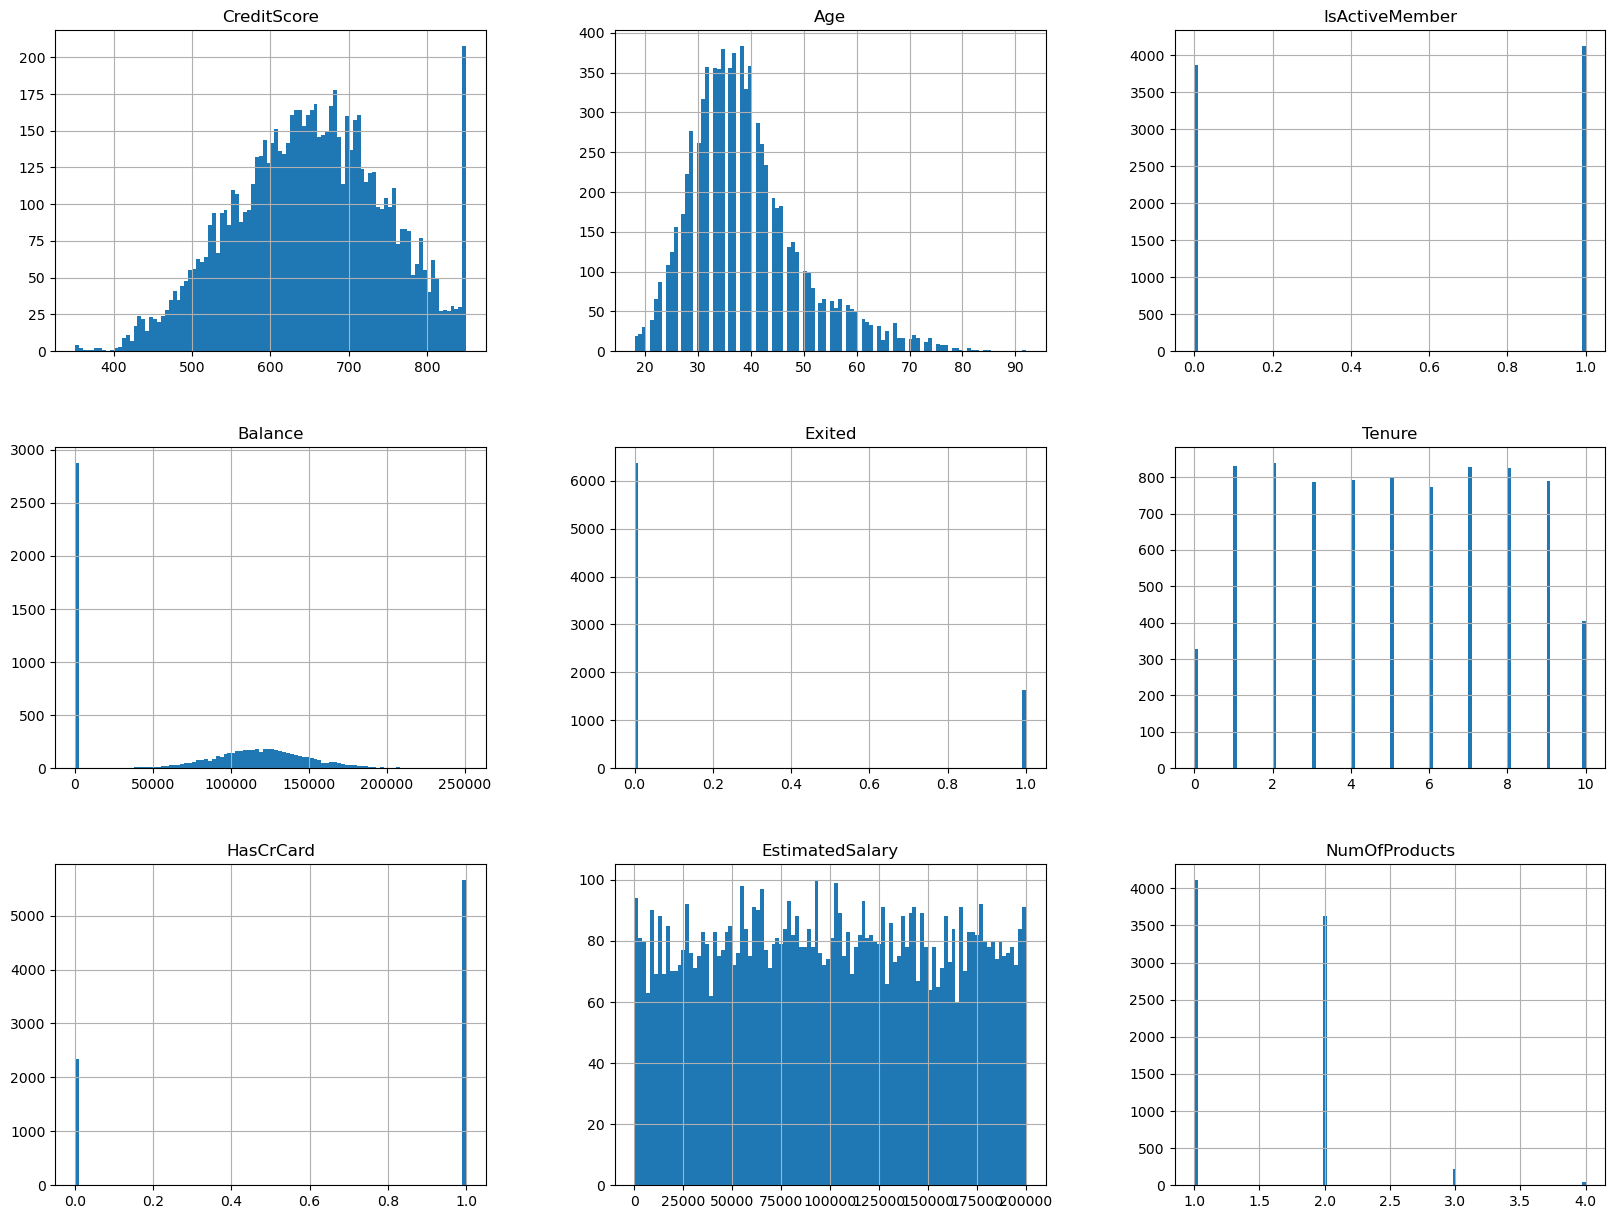

In [30]:
train_data[num_cols].hist(bins=100 , figsize=(20,15));

In [31]:
#making dataframes each of them contains the categories of a catgegorical variable and theire frequencies
df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['CustomerId'].count().reset_index().rename(columns = {'CustomerId' : 'count'}))

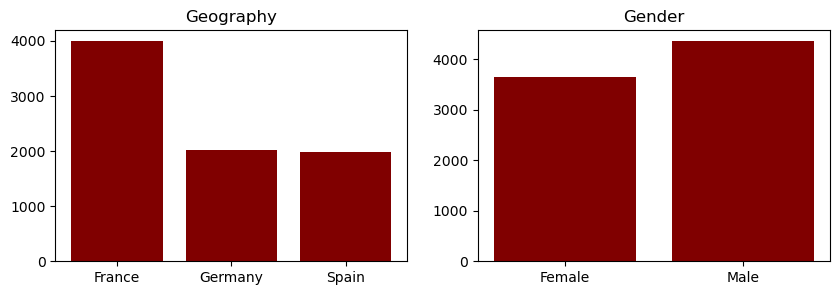

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
i=0
j=0
for df in df_list:
    axes[j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[j].set_title(df.columns[0])
    if(j<1):
        j+=1
    
plt.show()

In [33]:
train_data.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping any column which has 80% of values with the same value 


In [34]:
num_cols = list(set(train_data.describe().columns.to_list()) - set(['CustomerId']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['CustomerId']))

def drop_redundant_coulmns(train_data , columns_type ):
    check_value = (80/100) * train_data.shape[0]
    droped_cols = []
    for col in columns_type:
        ma_x = max(train_data.groupby([col])['CustomerId'].count())
        if ma_x >= check_value :
            droped_cols.append(col)
            train_data.drop(columns= [col], inplace=True)
    return droped_cols  

In [35]:
drop_redundant_coulmns(train_data , num_cols)

[]

In [36]:
drop_redundant_coulmns(train_data , cat_cols)

[]

In [37]:
num_cols = list(set(train_data.describe().columns.to_list()) - set(['CustomerId','HasCrCard','IsActiveMember','Exited']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['CustomerId','HasCrCard','IsActiveMember','Exited']))

# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [38]:
# def outliers_clamping(train_data , num_cols):
#     for col in num_cols:
    
#         Q1 = np.quantile(train_data[col] , .25)
#         Q3 = np.quantile(train_data[col] , .75)

#         IQR = Q3 - Q1

#         Upper_Bound = Q3 + 1.5*IQR
#         Lower_Bound = Q1 - 1.5*IQR

#         indxs = train_data[train_data[col] > Upper_Bound][[col]].index 
#         train_data.loc[indxs , col] = Upper_Bound
        
#         indxs = validation_data[validation_data[col] > Upper_Bound][[col]].index 
#         validation_data.loc[indxs , col] = Upper_Bound
        
        
#         indxs = train_data[train_data[col] < Lower_Bound][[col]].index 
#         train_data.loc[indxs , col] = Lower_Bound
        
#         indxs = validation_data[validation_data[col] < Lower_Bound][[col]].index 
#         validation_data.loc[indxs , col] = Lower_Bound

# not need to handle outliers because data is small 

In [39]:
# outliers_clamping(train_data, num_cols)

# Skewness Handling

In [40]:
def calc_skewness(train_data , num_cols):
    N = train_data.shape[0]
#     skewness_dic ={}
    skewness_coef =[]
    for col in num_cols:
        skewness =np.sum((train_data[col] - np.mean(train_data[col]))**3) / ((N-1) * (np.std(train_data[col])**3))
#         skewness_dic.update({col:skewness})
        skewness_coef.append(skewness)
    return skewness_coef 

In [41]:
skewness_coef = calc_skewness(train_data , num_cols)
skewness_coef

[-0.06808853133508315,
 1.0183075354502096,
 -0.14295552594968786,
 0.0042880099133984165,
 0.006118676559291461,
 0.7744037329294179]

In [42]:
def log_transform(train_data , num_cols):
    skewness_coef = calc_skewness(train_data , num_cols)
    i=0
    for col in num_cols:
        if np.abs(skewness_coef[i]) > 1:
            train_data[col] = np.log(1+ np.abs( train_data[col]))
            validation_data[col] = np.log(1+ np.abs( validation_data[col]))
            print(col)

        i+=1    
        
    return train_data    

In [43]:
log_transform(train_data , num_cols)

Age


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5516,15569878,592,France,Male,3.637586,3,96651.03,1,1,1,3232.82,0
1255,15615032,624,Spain,Male,3.850148,3,0.00,2,1,1,62825.03,0
4319,15759456,609,Spain,Male,3.555348,7,140694.78,2,1,0,46266.63,0
9372,15775826,677,France,Male,3.433987,1,78133.15,1,0,1,174225.88,0
1723,15567422,630,France,Male,3.761200,6,0.00,2,1,0,162697.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6384,15812073,529,France,Female,3.465736,7,0.00,2,1,1,175697.87,0
4720,15780654,619,Germany,Female,3.526361,3,100488.92,2,0,1,36446.74,0
173,15586310,578,France,Male,3.433987,4,169462.09,1,1,0,112187.11,0
1244,15616709,587,Germany,Female,3.663562,0,132122.42,2,0,0,31730.32,0


In [44]:
feats_std_scale = []
feats_min_max_scale = []
sample_data = train_data.sample(replace=False , n= 500)
from scipy.stats import shapiro
for col in num_cols:
    w_stat, p = shapiro(sample_data[col])
    

    alpha = .001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_min_max_scale.append(col)

CreditScore looks like gaussian (fail to reject H0)
W_Statistic=0.994, p=0.04311322 

Age looks like gaussian (fail to reject H0)
W_Statistic=0.991, p=0.00356955 

Balance does not look Gaussian (reject H0)
W_Statistic=0.847, p=0.00000000 

Tenure does not look Gaussian (reject H0)
W_Statistic=0.952, p=0.00000000 

EstimatedSalary does not look Gaussian (reject H0)
W_Statistic=0.957, p=0.00000000 

NumOfProducts does not look Gaussian (reject H0)
W_Statistic=0.722, p=0.00000000 



In [45]:
feats_std_scale

['CreditScore', 'Age']

In [46]:
feats_min_max_scale 

['Balance', 'Tenure', 'EstimatedSalary', 'NumOfProducts']

In [47]:
train_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5516,15569878,592,France,Male,3.637586,3,96651.03,1,1,1,3232.82,0
1255,15615032,624,Spain,Male,3.850148,3,0.00,2,1,1,62825.03,0
4319,15759456,609,Spain,Male,3.555348,7,140694.78,2,1,0,46266.63,0
9372,15775826,677,France,Male,3.433987,1,78133.15,1,0,1,174225.88,0
1723,15567422,630,France,Male,3.761200,6,0.00,2,1,0,162697.93,0


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
train_data[feats_min_max_scale] = min_max_scaler.fit_transform(train_data[feats_min_max_scale])
validation_data[feats_min_max_scale] = min_max_scaler.transform(validation_data[feats_min_max_scale])



std_scaler = StandardScaler()
train_data[feats_std_scale] = std_scaler.fit_transform(train_data[feats_std_scale])
validation_data[feats_std_scale] = std_scaler.transform(validation_data[feats_std_scale])


In [49]:
train_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5516,15569878,-0.609957,France,Male,-0.066483,0.3,0.385220,0.000000,1,1,0.016108,0
1255,15615032,-0.278558,Spain,Male,0.775196,0.3,0.000000,0.333333,1,1,0.314097,0
4319,15759456,-0.433901,Spain,Male,-0.392121,0.7,0.560765,0.333333,1,0,0.231297,0
9372,15775826,0.270320,France,Male,-0.872673,0.1,0.311414,0.000000,0,1,0.871155,0
1723,15567422,-0.216421,France,Male,0.422991,0.6,0.000000,0.333333,1,0,0.813509,0


In [50]:
cat_cols

['Geography', 'Gender']

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
validation_data['Gender'] = label_encoder.transform(validation_data['Gender'])

one_hot_enc_model = OneHotEncoder(sparse_output = False).fit(train_data[['Geography']])
nominal_train_data = one_hot_enc_model.transform(train_data[['Geography']])
nominal_val_data = one_hot_enc_model.transform(train_data[['Geography']])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)
nominal_val_df = pd.DataFrame(nominal_val_data, columns = col_names)


In [52]:
nominal_train_df

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
7995,1.0,0.0,0.0
7996,0.0,1.0,0.0
7997,1.0,0.0,0.0
7998,0.0,1.0,0.0


In [53]:
train_data.shape

(8000, 12)

In [54]:
train_data = train_data.reset_index().drop(columns=['index'])
validation_data = validation_data.reset_index().drop(columns=['index'])
# this step to can make inner merge

In [55]:
train_data = train_data.drop(columns=['Geography','CustomerId']).merge(nominal_train_df , right_index=True , left_index=True, how='inner')
validation_data = validation_data.drop(columns=['Geography','CustomerId']).merge(nominal_val_df , right_index=True , left_index=True ,  how='inner')

In [56]:
train_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.609957,1,-0.066483,0.3,0.385220,0.000000,1,1,0.016108,0,1.0,0.0,0.0
1,-0.278558,1,0.775196,0.3,0.000000,0.333333,1,1,0.314097,0,0.0,0.0,1.0
2,-0.433901,1,-0.392121,0.7,0.560765,0.333333,1,0,0.231297,0,0.0,0.0,1.0
3,0.270320,1,-0.872673,0.1,0.311414,0.000000,0,1,0.871155,0,1.0,0.0,0.0
4,-0.216421,1,0.422991,0.6,0.000000,0.333333,1,0,0.813509,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.262397,0,-0.746958,0.7,0.000000,0.333333,1,1,0.878515,0,1.0,0.0,0.0
7996,-0.330339,0,-0.506902,0.3,0.400517,0.333333,0,1,0.182193,0,0.0,1.0,0.0
7997,-0.754943,1,-0.872673,0.4,0.675422,0.000000,1,0,0.560931,0,1.0,0.0,0.0
7998,-0.661738,0,0.036372,0.0,0.526598,0.333333,0,0,0.158609,0,0.0,1.0,0.0


# handle unbalanced data by under sampling


In [136]:
len(train_data[train_data['Exited'] == 1]) / len(train_data[train_data['Exited'] == 0])

0.2547051442910916

In [138]:
rare_class_data = train_data[train_data['Exited'] == 1]
dominant_class_data = train_data[train_data['Exited'] == 0]
under_sample_class = dominant_class_data.sample(frac=.25 , replace=False , random_state=2022)
train_data_balnced = pd.concat((rare_class_data , under_sample_class) , axis=0)
train_data_balnced

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
7,0.311745,1,0.514023,0.3,0.264405,0.000000,1,1,0.093814,1,1.0,0.0,0.0
11,-0.247490,0,1.468951,0.6,0.000000,0.000000,0,0,0.459706,1,0.0,0.0,1.0
12,-0.143928,1,-0.872673,0.1,0.486993,0.000000,1,0,0.512823,1,0.0,1.0,0.0
24,2.061942,0,-0.280572,0.2,0.322568,0.000000,0,0,0.063146,1,0.0,1.0,0.0
31,-0.402833,1,-0.506902,0.5,0.276919,0.000000,1,0,0.044815,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-0.723875,0,0.775196,0.1,0.000000,0.333333,1,0,0.521352,0,0.0,0.0,1.0
169,-2.080537,1,-1.569146,0.9,0.295886,0.333333,0,1,0.977352,0,0.0,0.0,1.0
725,0.601718,1,1.935336,0.3,0.000000,0.333333,1,1,0.410957,0,0.0,0.0,1.0
897,-1.987331,1,1.098617,0.5,0.435985,0.000000,1,0,0.778622,0,0.0,1.0,0.0


In [139]:
x_train = train_data_balnced.drop(columns=['Exited'])
y_train = train_data_balnced['Exited']

x_val = validation_data.drop(columns=['Exited'])
y_val = validation_data['Exited']

# Logistic Regression From Scratch

In [222]:
def initialize(x , bais=True):
    if bais :
        params = np.zeros((x.shape[1]+1 , 1))
        x = np.c_[np.ones((x.shape[0],1)) , x]
    else:
        params = np.zeros((x.shape[1] , 1))
        
    return params , x

def sigmoid(z):
    sig = 1/(1+np.e ** (-z))
    return sig

def fit(x , y , lr=.001 , bais=True , max_itr=100):
    params , x = initialize(x,bais)
    for i in range(max_itr):
        params = params - lr * ((x.T).dot(sigmoid(np.dot(x , params)) - np.reshape(y , (len(y),1))))
        
    return params

def predict(x, optimal_para, bais=True , threshold=.5):
    z = np.dot(initialize(x,bais)[1] , optimal_para)
    pred=[]
    for predicted_value in sigmoid(z):
        if predicted_value > threshold:
            pred.append(1)
        else:
            pred.append(0)
    return pred
    
bais = True
max_itr = 100
lr = .001
thershold = 0.5
params = fit(x_train , y_train , lr= lr , bais=bais , max_itr=max_itr)

In [223]:
train_pred = predict(x_train, params, bais=bais , threshold=thershold)

In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(train_pred , y_train)

0.7131758856432567

In [225]:
val_pred = predict(x_val, params, bais=bais , threshold=thershold)

In [226]:
accuracy_score(val_pred , y_val)

0.694

### accuracy before balance is higher but Misleading , after balance it will we decrease but model will predict more good

# sklearn model

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= max_itr , fit_intercept=bais)
model.fit(x_train , y_train)
y_sklearn_pred = model.predict(x_val)
accuracy_score(y_sklearn_pred ,y_val)

0.6945

In [228]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_val, val_pred)).rename(index={0:'actual_not_churn' ,1:'actual_churn'},
                                                                          columns={0:'predicted_not_churn' ,1:'predicted_churn'})
confusion_matrix

,predicted_not_churn,predicted_churn
actual_not_churn,1085,502
actual_churn,110,303


In [229]:
people_predicted_not_churn = confusion_matrix.iloc[: ,0].sum()
people_predicted_churn = confusion_matrix.iloc[: ,1].sum()

people_actual_not_churn = confusion_matrix.iloc[0,:].sum()
people_actual_churn = confusion_matrix.iloc[1,:].sum()


In [230]:
precison_not_churn = confusion_matrix.iloc[0,0] / people_predicted_not_churn
precison_churn = confusion_matrix.iloc[1,1] / people_predicted_churn

recall_not_churn = confusion_matrix.iloc[0,0] / people_actual_not_churn
recall_churn = confusion_matrix.iloc[1,1] / people_actual_churn

F1_score_not_churn = 2 * ((precison_not_churn*recall_not_churn)/(precison_not_churn+recall_not_churn))
F1_score_churn = 2 * ((precison_churn*recall_churn)/(precison_churn+recall_churn))

In [231]:
print(f"people_predicted_not_churn :{people_predicted_not_churn}")
print(f"people_predicted_churn :{people_predicted_churn}")
print(f"people_actual_not_churn :{people_actual_not_churn}")
print(f"people_actual_churn :{people_actual_churn}")
print(f"precison_not_churn :{precison_not_churn}")
print(f"precison_churn :{precison_churn}")
print(f"recall_not_churn: {recall_not_churn}")
print(f"recall_churn : {recall_churn}")
print(f"F1_score_not_churn : {F1_score_not_churn}")
print(f"F1_score_churn : {F1_score_churn}")

people_predicted_not_churn :1195
people_predicted_churn :805
people_actual_not_churn :1587
people_actual_churn :413
precison_not_churn :0.9079497907949791
precison_churn :0.3763975155279503
recall_not_churn: 0.6836798991808444
recall_churn : 0.7336561743341404
F1_score_not_churn : 0.7800143781452193
F1_score_churn : 0.4975369458128079


#####  before balance the data recall churn is bad because i have unbalanced data  so we should balance data before training

In [232]:
from sklearn.metrics import recall_score
recall_score(y_val,val_pred,pos_label=1)

0.7336561743341404

In [233]:
from sklearn.metrics import precision_score
precision_score(y_val,val_pred,pos_label=0)

0.9079497907949791

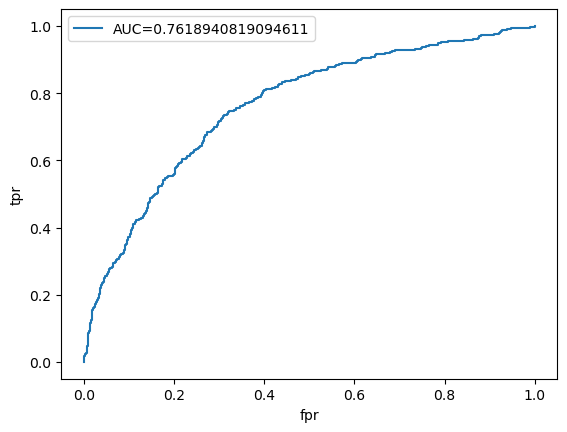

In [234]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_proba = model.predict_proba(x_val)[::,1]
fpr , tpr , thresholds = roc_curve(y_val , y_pred_proba)
auc = roc_auc_score(y_val , y_pred_proba)
plt.plot(fpr , tpr , label = "AUC="+str(auc))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(loc = 2)
plt.show()

### if I want recall >= 70% 

In [239]:
x = np.where(tpr>=.7)[0][0] # first value
thershold_need = thresholds[x]
thershold_need
# if i take this theshold and put it in my model i will get needed recall
#but precsion will decrease 

0.5119691544248328